# TNGtools.Profile_1D 使用的简单介绍

In [1]:
from AnastrisTNG import TNGsimulation, TNGtools, Anatools  #导入模块
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])

In [2]:
run = 'TNG50'
BasePath = '/home/dumin/IllustrisTNG/' + run + '-1/output/'         
snap=99                                                            

###  设置除了位置、速度、质量、ID，需要额外载入的一些粒子属性

In [3]:
Snapshot=TNGsimulation.Snapshot(BasePath,snap)         
Snapshot.load_particle_para['star_fields']=['GFM_StellarFormationTime','BirthPos','GFM_StellarPhotometrics','GFM_InitialMass']
Snapshot.load_particle_para['gas_fields']=['ElectronAbundance','GFM_CoolingRate','GFM_Metallicity','GFM_Metals','InternalEnergy','Machnumber','StarFormationRate']         

### 载入ID为253864的subhalo 和ID为250的halo

In [4]:
sub = Snapshot.load_particle(253864,groupType='Subhalo')
hal = Snapshot.load_particle(250, groupType='Halo')

### 单位物理化，并face on

In [5]:
sub.physical_units()
hal.physical_units()
sub.face_on(alignwith = 'star',rmax=8)
hal.face_on(rmax=30)

### 计算包含95%所有物质的半径 r

In [9]:
print(sub.r(0.95,calfor='all'))
print(hal.r(0.95,calfor='all'))

136.01840009577478
267.42088998072234


### 使用Profile_1D 进行分析

In [10]:
subpro = TNGtools.Profile_1D(sub,rmax=100)
halpro = TNGtools.Profile_1D(hal,rmax=200)

Profile_1D -- assumes it's already at the center, and the disk is in the x-y plane
If not, please use face_on()
Profile_1D -- assumes it's already at the center, and the disk is in the x-y plane
If not, please use face_on()


###  查看使用文档

In [15]:
print(TNGtools.Profile_1D.__init__.__doc__)


        Initializes the profile object for different types of particles in the simulation.

        Parameters:
        -----------
        sim : object
            The simulation data object containing particles of different types (e.g., stars, gas, dark matter).
        rmin : float, optional
            The minimum radius for the profile (default is 0.1).
        rmax : float, optional
            The maximum radius for the profile (default is 100.0).
        zmax : float, optional
            maximum height to consider (default is 5.0).
        nbins : int, optional
            The number of bins to use in the profile (default is 100).
        type : str, optional
            The type of profile ('lin' for linear or other types as needed, default is 'lin').

        **kwargs : additional keyword arguments
            Additional parameters to pass to the Profile initialization.
            
        Usage: str like 'A-B-C'
                A: the parameter key,  d_A, derivatives, A_d

### 查看某个参数的径向分布

Text(0, 0.5, 'temp-gas [$\\mathrm{K}$]')

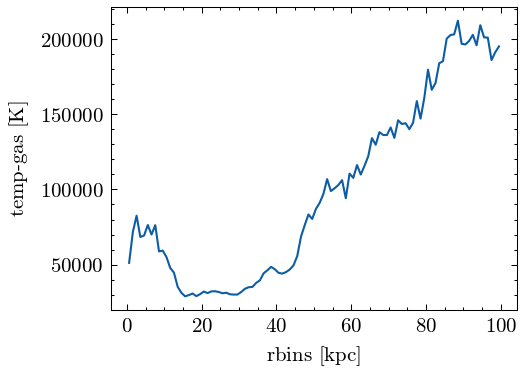

In [22]:
plt.figure(dpi=150)
X = 'rbins'
Y = 'temp-gas'
plt.plot(subpro[X],subpro[Y])
plt.xlabel(X+' [$'+subpro[X].units.latex()+'$]')
plt.ylabel(Y+' [$'+subpro[Y].units.latex()+'$]')

## pro[str]
### str 组成 可以是A，A-B，A-C，A-B-C
#### A： 参数名称, 或者 d_A 为其导数, A_disp 为其标准差, A_med 为其中位数, A_rms 为其均方根, A_30 为其 30%的质量加权百分位数 ...
#### B： 什么粒子，star 为恒星，gas为气体，dm为暗物质，all为所有引力物质
#### C： 方向以及维度： 'z', 'Z', 'r', 'R';  小写为 3D， 大写为2D
#### 例子：‘vr-star-R’ 为恒星的vr速度的 R向分布

## 更详细的示例

/home/lushuai/.local/lib/python3.8/site-packages/pynbody/analysis/profile.py:739: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(p['rbins'] * dOmega2dR + 4 * p['omega'] ** 2)


Text(0.5, 0, 'R [kpc]')

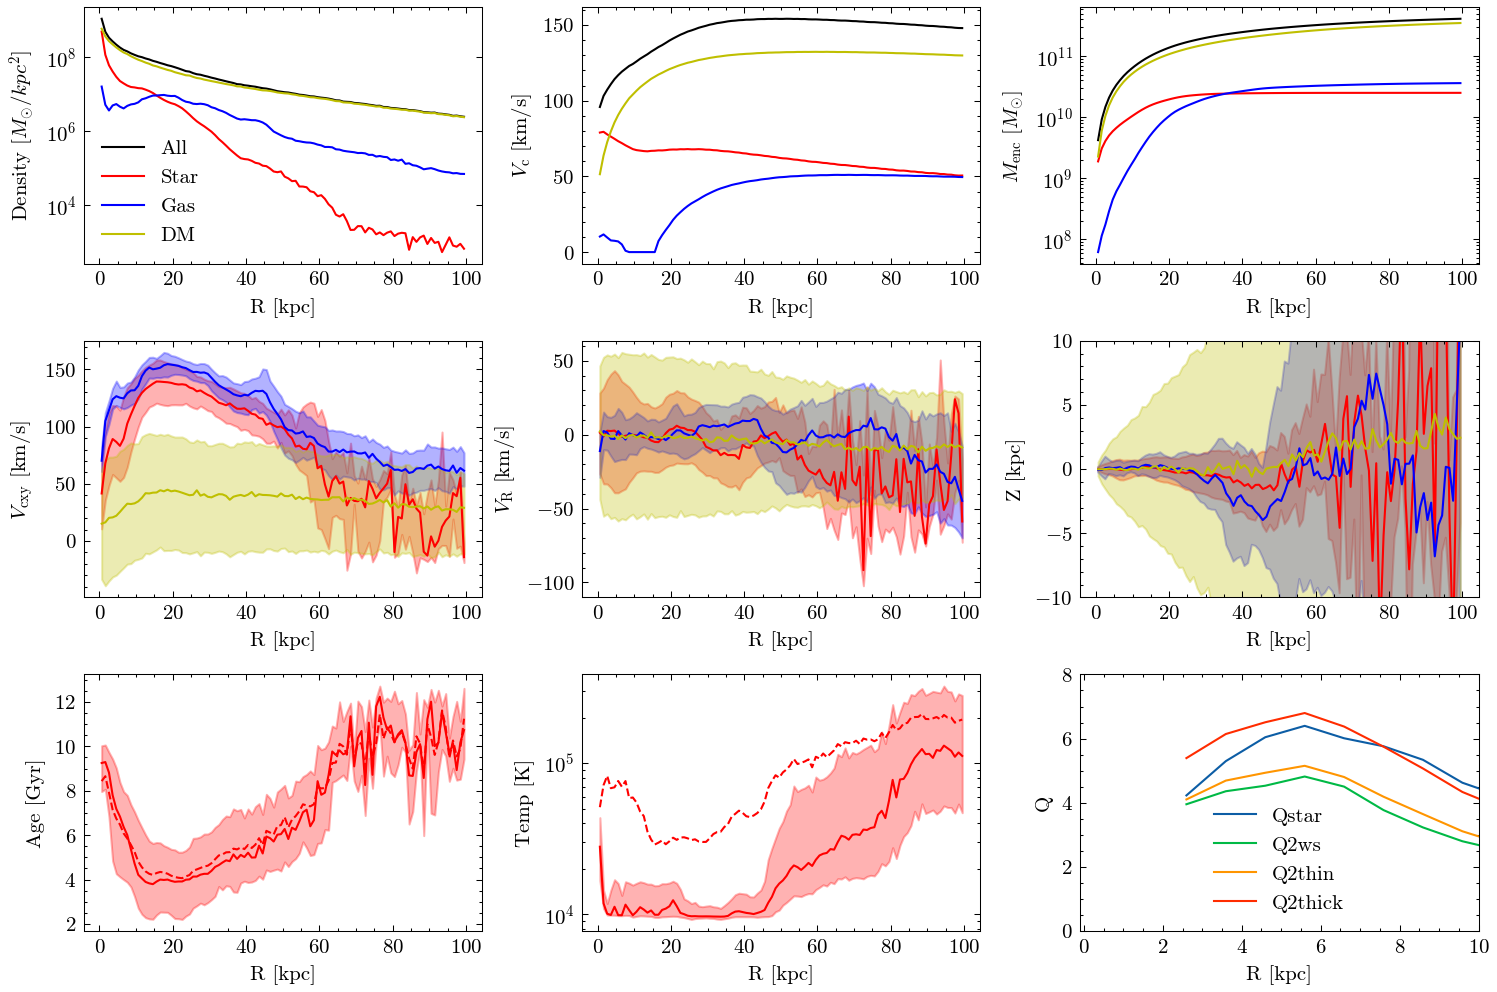

In [ ]:
fig3 = plt.figure(dpi=150,figsize=(12,8))
gs=fig3.add_gridspec(3,3,wspace=0.25,hspace=0.3)
axs = np.array([[plt.subplot(gs[i,j]) for j in range(3)] for i in range(3)])

axs[0,0].plot(subpro['rbins'],subpro['density-all-R'],label='All',c='k')
axs[0,0].plot(subpro['rbins'],subpro['density-star-R'],label='Star',c='r')
axs[0,0].plot(subpro['rbins'],subpro['density-gas-R'],label='Gas',c='b')
axs[0,0].plot(subpro['rbins'],subpro['density-dm-R'],label='DM',c='y')
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel('Density $[M_{\odot}/kpc^2]$')
axs[0,0].set_xlabel('R [kpc]')
axs[0,0].legend()

axs[0,1].plot(subpro['rbins'],subpro['v_circ-all-R'],label='All',c='k')
axs[0,1].plot(subpro['rbins'],subpro['v_circ-star-R'],label='Star',c='r')
axs[0,1].plot(subpro['rbins'],subpro['v_circ-gas-R'],label='Gas',c='b')
axs[0,1].plot(subpro['rbins'],subpro['v_circ-dm-R'],label='DM',c='y')
axs[0,1].set_ylabel('$V_\mathrm{c}$ [km/s]')
axs[0,1].set_xlabel('R [kpc]')

axs[0,2].plot(subpro['rbins'],subpro['mass_enc-all-R'],label='All',c='k')
axs[0,2].plot(subpro['rbins'],subpro['mass_enc-star-R'],label='Star',c='r')
axs[0,2].plot(subpro['rbins'],subpro['mass_enc-gas-R'],label='Gas',c='b')
axs[0,2].plot(subpro['rbins'],subpro['mass_enc-dm-R'],label='DM',c='y')
axs[0,2].set_yscale('log')
axs[0,2].set_ylabel('$M_\mathrm{enc}\ [M_{\odot}]$ ')
axs[0,2].set_xlabel('R [kpc]')
subpro

axs[1,0].plot(subpro['rbins'],subpro['vcxy_50-star-R'],label='Star',c='r')
axs[1,0].fill_between(subpro['rbins'],subpro['vcxy_30-star-R'],subpro['vcxy_70-star-R'],color='r',alpha=0.3)

axs[1,0].plot(subpro['rbins'],subpro['vcxy_50-gas-R'],label='Gas',c='b')
axs[1,0].fill_between(subpro['rbins'],subpro['vcxy_30-gas-R'],subpro['vcxy_70-gas-R'],color='b',alpha=0.3)

axs[1,0].plot(subpro['rbins'],subpro['vcxy_50-dm-R'],label='DM',c='y')
axs[1,0].fill_between(subpro['rbins'],subpro['vcxy_30-dm-R'],subpro['vcxy_70-dm-R'],color='y',alpha=0.3)
axs[1,0].set_ylabel('$V_\mathrm{cxy}$ [km/s]')
axs[1,0].set_xlabel('R [kpc]')

axs[1,1].plot(subpro['rbins'],subpro['vrxy_50-star-R'],label='Star',c='r')
axs[1,1].fill_between(subpro['rbins'],subpro['vrxy_30-star-R'],subpro['vrxy_70-star-R'],color='r',alpha=0.3)

axs[1,1].plot(subpro['rbins'],subpro['vrxy_50-gas-R'],label='Gas',c='b')
axs[1,1].fill_between(subpro['rbins'],subpro['vrxy_30-gas-R'],subpro['vrxy_70-gas-R'],color='b',alpha=0.3)

axs[1,1].plot(subpro['rbins'],subpro['vrxy_50-dm-R'],label='DM',c='y')
axs[1,1].fill_between(subpro['rbins'],subpro['vrxy_30-dm-R'],subpro['vrxy_70-dm-R'],color='y',alpha=0.3)
axs[1,1].set_ylabel('$V_\mathrm{R}$ [km/s]')
axs[1,1].set_xlabel('R [kpc]')

axs[1,2].plot(subpro['rbins'],subpro['z_50-star-R'],label='Star',c='r')
axs[1,2].fill_between(subpro['rbins'],subpro['z_30-star-R'],subpro['z_70-star-R'],color='r',alpha=0.3)

axs[1,2].plot(subpro['rbins'],subpro['z_50-gas-R'],label='Gas',c='b')
axs[1,2].fill_between(subpro['rbins'],subpro['z_30-gas-R'],subpro['z_70-gas-R'],color='b',alpha=0.3)

axs[1,2].plot(subpro['rbins'],subpro['z_50-dm-R'],label='DM',c='y')
axs[1,2].fill_between(subpro['rbins'],subpro['z_30-dm-R'],subpro['z_70-dm-R'],color='y',alpha=0.3)
axs[1,2].set_ylabel('Z [kpc]')
axs[1,2].set_ylim(-10,10)
axs[1,2].set_xlabel('R [kpc]')

axs[2,0].plot(subpro['rbins'],subpro['age-star-R'],c='r',linestyle='--')
axs[2,0].plot(subpro['rbins'],subpro['age_50-star-R'],c='r')
axs[2,0].fill_between(subpro['rbins'],subpro['age_30-star-R'],subpro['age_70-star-R'],color='r',alpha=0.3)

axs[2,0].set_ylabel('Age [Gyr]')
axs[2,0].set_xlabel('R [kpc]')

axs[2,1].plot(subpro['rbins'],subpro['temp-gas-R'],c='r',linestyle='--')
axs[2,1].plot(subpro['rbins'],subpro['temp_50-gas-R'],c='r')
axs[2,1].fill_between(subpro['rbins'],subpro['temp_30-gas-R'],subpro['temp_70-gas-R'],color='r',alpha=0.3)

axs[2,1].set_ylabel('Temp [K]')
axs[2,1].set_yscale('log')
axs[2,1].set_xlabel('R [kpc]')

axs[2,2].plot(subpro['rbins'],subpro['Qstar'],label='Qstar')
axs[2,2].plot(subpro['rbins'],subpro['Q2ws'],label='Q2ws')
axs[2,2].plot(subpro['rbins'],subpro['Q2thin'],label='Q2thin')
axs[2,2].plot(subpro['rbins'],subpro['Q2thick'],label='Q2thick')
axs[2,2].legend()
axs[2,2].set_ylim(0,8)
axs[2,2].set_xlim(-0.1,10)
axs[2,2].set_ylabel('Q')
axs[2,2].set_xlabel('R [kpc]')